# Práctica 1 B
**Grupo 16**
- Erik Karlgren Domercq
- David Bugoi
- Daniela Alejandra Córdova Porta

Cargamos la librería de aima y la clase `Problem` que usaremos para los siguientes problemas. Hemos resuelto los ejercicios 1, 2 y 4.

In [4]:
cd aima-python

C:\Users\Daniela\Documents\UCM IA\github\aima-python


In [1]:
class Problem(object):

    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2.  If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1

    def value(self, state):
        """For optimization problems, each state has a value.  Hill-climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError

    def coste_de_aplicar_accion(self, estado, accion):
        """Hemos incluido está función que devuelve el coste de un único operador (aplicar accion a estado). Por defecto, este
        coste es 1. Reimplementar si el problema define otro coste """ 
        return 1

# Ejercicio 1
Un grupo de 5 personas quiere cruzar un viejo y estrecho puente. Es una noche cerrada y se necesita llevar una linterna para cruzar. El grupo solo dispone de una linterna, a la que le quedan 5 minutos de batería.
1. Cada persona tarda en cruzar 10, 30, 60, 80 y 120 segundos, respectivamente.
2. El puente solo resiste un máximo de 2 personas cruzando a la vez, y cuando cruzan dos personas juntas, caminan a la velocidad del más lento.
3. No se puede lanzar la linterna de un extremo a otro del puente, así que cada vez que crucen dos personas, alguien tiene que volver a cruzar hacia atrás con la linterna a buscar a los compañeros que falten, y así hasta que hayan cruzado todos.

Definimos la clase del problema. Si se desea se pueden cambiar algunos de los parámetros como el número de personas, los tiempos de cada una y la duración de la batería de la linterna o su "tiempo límite".

In [3]:
from copy import deepcopy

class CruzarPuente(Problem):
    times = tuple()
    num_personas = 0

    def __init__(self, num_personas=5, time_limit=300, times=(10, 30, 60, 80, 120)):
        self.initial = ('left', tuple([x for x in range(1, num_personas + 1)]), 0)
        self.goal = ('right', (), time_limit)
        self.times = times
        self.num_personas = num_personas

    def cost(self, action):
        return max(self.times[action[0] - 1], self.times[action[1] - 1])

    def actions(self, state):
        accs = list()
        if state[0] == 'left':
            for x in state[1]:
                for y in state[1]:
                    if x <= y and state[2] + self.cost((x, y)) <= self.goal[2]:
                        accs.append((x, y))
        else:
            for x in range(1, self.num_personas + 1):
                if x not in state[1] and state[2] + self.cost((x, x)) <= self.goal[2]:
                    accs.append((x, x))
        return accs

    def result(self, state, action):
        new_state = deepcopy(state)
        linterna = new_state[0]
        l = list(new_state[1])
        tiempo = new_state[2]
        if new_state[0] == 'left':
            linterna = 'right'
            if action[0] == action[1]:
                l.remove(action[0])
            else:
                l.remove(action[0])
                l.remove(action[1])
        else:
            linterna = 'left'
            l.append(action[0])
        tiempo += self.cost(action)
        return (linterna, tuple(l), tiempo)

    def path_cost(self, c, state1, action, state2):
        return c + self.cost(action)

    def goal_test(self, state):
        if isinstance(self.goal, tuple):
            linterna_is_equal = state[0] == self.goal[0]
            personas_is_equal = state[1] == self.goal[1]
            time_limit_is_legal = state[2] <= self.goal[2]
            return linterna_is_equal and personas_is_equal and time_limit_is_legal
        else:
            return False

    def finalTime(self, state):
        return state[2]         

In [19]:
class Problema_con_Analizados(Problem):
         
    def __init__(self, problem):
        self.initial = problem.initial
        self.problem = problem
        self.analizados  = 0
        self.goal = problem.goal

    def actions(self, estado):
        return self.problem.actions(estado)

    def result(self, estado, accion):
        return self.problem.result(estado, accion)

    def goal_test(self, state):
        self.analizados += 1
        if isinstance(self.goal, tuple):
            linterna_is_equal = state[0] == self.goal[0]
            personas_is_equal = state[1] == self.goal[1]
            time_limit_is_legal = state[2] <= self.goal[2]
            return linterna_is_equal and personas_is_equal and time_limit_is_legal
        else:
            return False

    def coste_de_aplicar_accion(self, estado, accion):
        return c + self.cost(action)       

In [18]:
# Solo sirve para el problema con los mismos parámetros del enunciado
def resuelve_CruzarPuente(estado_inicial, algoritmo, h=None):
    pF=Problema_con_Analizados(CruzarPuente())
    if h: 
        sol= algoritmo(pF,h)
    else: 
        sol= algoritmo(pF)
    print("Solución: {0}".format(sol.solution()))
    print("Algoritmo: {0}".format(algoritmo.__name__))
    if h: 
        print("Heurística: {0}".format(h.__name__))
    else:
        pass
    print("Longitud de la solución: {0}. Nodos analizados: {1}. Tiempo: {2} ".format(len(sol.solution()),pF.analizados, sol.state[2]))


Comprobamos que el estado inicial y las acciones disponibles son las esperadas.

In [6]:
# Cargamos el módulo con los algoritmos de búsqueda.
from search import *

In [7]:
p = CruzarPuente()
p.initial

('left', (1, 2, 3, 4, 5), 0)

In [8]:
p.actions(p.initial)

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 4),
 (4, 5),
 (5, 5)]

Probemos varios algoritmos de búsqueda no informados. Nótese que el campo _Tiempo_ al usar `resuelve_CruzarPuente` no se refiere al tiempo de ejecución del algoritmo sino al tiempo usado de la linterna en el problema.

Como vemos en los resultados de las siguientes dos celdas, la búsqueda con control de repetidos permite analizar muchos menos nodos, y por eso `depth_first_graph_search` tarda menos tiempo y consume menos memoria. También influye que la búsqueda en profundidad ya consume menos memoria de por sí que la búsqueda en anchura.

In [9]:
# La búsqueda en anchura asegura encontrar la solución si esta existe
breadth_first_tree_search(CruzarPuente()).solution()

[(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]

In [10]:
%%timeit
breadth_first_tree_search(CruzarPuente()).solution()

123 ms ± 4.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
depth_first_graph_search(CruzarPuente()).solution()

50.4 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
resuelve_CruzarPuente(p.initial, breadth_first_tree_search )

Solución: [(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]
Algoritmo: breadth_first_tree_search
Longitud de la solución: 7. Nodos analizados: 6144. Tiempo: 290 


In [13]:
resuelve_CruzarPuente(p.initial, depth_first_graph_search )

Solución: [(1, 3), (1, 1), (1, 2), (2, 2), (4, 5), (1, 1), (1, 2)]
Algoritmo: depth_first_graph_search
Longitud de la solución: 7. Nodos analizados: 1733. Tiempo: 290 


Si cambiáramos los parámetros del problema, y sobre todo si incrementáramos el número de personas o el tiempo límite de la linterna, las búsquedas no informadas dejarían de ser capaces de resolver el problema en un tiempo razonable. Por ello vamos a introducir algunas heurísticas que nos deberían ayudar a encontrar la solución de forma más eficiente.

In [14]:
# Heuristicas 
import math

# Suma los costes de las personas a la izquierda del puente, dándole más peso al coste de la persona que está
# más a la izquierda de la tupla de personas a la izquierda del puente (se espera que sea la persona con menor
# coste de todos).
def h1(times=(10, 30, 60, 80, 120)):
    def heur1(node):
        state = node.state
        sum = 0
        cont = 0
        # m es la persona más a la izquierda en la tupla de personas a la izquierda del puente
        if(len(state[1])>0):
            m = state[1][0]
            
        for i in state[1]:
            if(i != m):
                sum += max(times[m-1],times[i-1])
                cont += 1
                
        for i in range(0,cont):
            sum += times[m-1]
        return sum
    return heur1

# Suma los tiempos de las personas que siguen en el lado izquierdo del puente
def h2(times=(10, 30, 60, 80, 120)):
    def heur2(node):
        state = node.state
        min = 0
        for x in state[1]:
            min = min + times[x-1]
        return min
    
    return heur2

# Producto del número de personas en el lado izquierdo del puente por el máximo coste para cruzar del problema.
# Surgió sin querer experimentando con h1.
def h3(times=(10, 30, 60, 80, 120)):
    def heur3(node):
        return max(times) * len(node.state[1])
    return heur3

# Versión más sofisticada de h3. Multiplica por el coste máximo de las personas a la izquierda del puente.
def h4(times=(10, 30, 60, 80, 120)):
    def heur4(node):
        if node.state[1]:
            return len(node.state[1]) * max(map(lambda n : times[n-1], node.state[1]))
        else: # La tupla de personas está vacía cuando se ha llegado a la solución
            return 0
    return heur4

- `h1` predice que la mejor solución del problema consiste en que la persona con menor coste de todas siempre es la que acompaña al resto a través del puente. Como veremos más abajo, no obstante, a veces compensa más que crucen juntos las 2 personas con mayor coste a la derecha del puente y que la persona con menor coste de dicho lado sea la que vuelva. Por tanto, esta heurística no parece ser admisible.


- `h2` supone que todas las personas pueden cruzar a la vez el puente o que todas tienen su propia linterna. El coste estimado por la heurística por tanto es menor que el coste real, lo que la hace admisible.


- Con `h3` se supone que todas las personas tienen el mismo coste, y este es el peor del problema. No obstante, también se considera que cada persona tiene su propia linterna y cruza el puente sola, así que el coste esperamos que sea menor que el coste real. Tenemos así otra heurística admisible en principio.


- `h4` es similar a `h3` con la diferencia de que en vez de usar el coste peor del problema usamos el coste peor de las personas que todavía están a la izquierda del puente. Al ser el coste estimado claramente menor o igual al de `h3`, esta heurística se acerca menos al coste real siempre y cuando `h3` realmente sea admisible. Si lo último es cierto, esta heurística también es admisible.

In [15]:
pf = CruzarPuente()

In [16]:
sol1 = astar_search(pf, h1()).solution()
sol2 = astar_search(pf, h2()).solution()
sol3 = astar_search(pf, h3()).solution()
sol4 = astar_search(pf, h4()).solution()
print("Solución usando h1:", sol1)
print("Solución usando h2:", sol2)
print("Solución usando h3:", sol3)
print("Solución usando h4:", sol4)

Solución usando h1: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Solución usando h2: [(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]
Solución usando h3: [(1, 2), (1, 1), (1, 3), (1, 1), (4, 5), (2, 2), (1, 2)]
Solución usando h4: [(1, 2), (1, 1), (4, 5), (2, 2), (1, 3), (1, 1), (1, 2)]


Como vemos en los resultados de este ejemplo, `h1` es la heurística que peor se comporta debido a su mayor complejidad de cálculo y a que aún así no filtra más nodos que las otras heurísticas. `h2` y `h3` son las más rápidas de calcular como se podía esperar por tener una implementación muy sencilla, aunque `h4` no tarda demasiado más. Esperamos que `h3` y `h4` sean las heurísticas que mejor se comporten con problemas de mayor tamaño por ser las que más nodos filtren.

In [17]:
%%timeit
astar_search(pf, h1()).solution()

93.6 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
astar_search(pf, h2()).solution()

3.24 ms ± 38 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
astar_search(pf, h3()).solution()

4.12 ms ± 76.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
astar_search(pf, h4()).solution()

16 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
resuelve_CruzarPuente(p.initial, astar_search,h1())

Solución: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Algoritmo: astar_search
Heurística: heur1
Longitud de la solución: 7. Nodos analizados: 929. Tiempo: 290 


In [22]:
resuelve_CruzarPuente(p.initial, astar_search,h2())

Solución: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Algoritmo: astar_search
Heurística: heur2
Longitud de la solución: 7. Nodos analizados: 892. Tiempo: 290 


In [23]:
resuelve_CruzarPuente(p.initial, astar_search,h3())

Solución: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Algoritmo: astar_search
Heurística: heur3
Longitud de la solución: 7. Nodos analizados: 611. Tiempo: 290 


In [24]:
resuelve_CruzarPuente(p.initial, astar_search,h4())

Solución: [(1, 3), (1, 1), (1, 2), (1, 1), (4, 5), (2, 2), (1, 2)]
Algoritmo: astar_search
Heurística: heur4
Longitud de la solución: 7. Nodos analizados: 771. Tiempo: 290 


Probemos con algunas variantes del problema. Usaremos `astar_search` con las 4 heurísticas anteriores. Como vemos a partir del problema con 7 personas, `h3` y `h4` se comportan mejor porque, como ya habíamos comentado, filtran más nodos.

In [25]:
# Problema con 6 personas
n1 = 6
t1 = (10,20,30,50,10,100)
limit1 = 200

p1 = CruzarPuente(num_personas=n1, times=t1, time_limit=limit1)
print("Initial:",p1.initial)
print("Times:", p1.times)
print("Time limit:", limit1)

Initial: ('left', (1, 2, 3, 4, 5, 6), 0)
Times: (10, 20, 30, 50, 10, 100)
Time limit: 200


In [26]:
%%timeit
astar_search(p1,h1(t1)).solution()

359 ms ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
astar_search(p1,h2(t1)).solution()

11.8 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
astar_search(p1,h3(t1)).solution()

52.5 ms ± 861 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit
astar_search(p1,h4(t1)).solution()

64.1 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
# Problema con 7 personas. Ya vemos que 'h2' deja de ser mejor heurística para este tamaño del problema.
n2 = 7
t2 = (10,20,25,30,40,45,70)
limit2 = 400

p2 = CruzarPuente(num_personas=n2, times=t2, time_limit=limit2)
print("Initial:",p2.initial)
print("Times:", p2.times)
print("Time limit:", limit2)

Initial: ('left', (1, 2, 3, 4, 5, 6, 7), 0)
Times: (10, 20, 25, 30, 40, 45, 70)
Time limit: 400


In [35]:
%%timeit
astar_search(p2,h1(t2)).solution()

2.19 s ± 128 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
astar_search(p2,h2(t2)).solution()

4.06 s ± 159 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
astar_search(p2,h3(t2)).solution()

12.4 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%%timeit
astar_search(p2,h4(t2)).solution()

11 ms ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
# Problema con 15 personas. Solo probamos a buscar la solución usando la heurística 'h1'.
n3 = 15
t3 = tuple([10*x for x in range(1, n3+1)])
limit3 = 1180

p3 = CruzarPuente(num_personas=n3, times=t3, time_limit=limit3)
print("Initial:",p3.initial)
print("Times:", p3.times)
print("Time limit:", limit3)

Initial: ('left', (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), 0)
Times: (10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150)
Time limit: 1180


In [40]:
%%timeit
astar_search(p3,h3(t3)).solution()

3.12 s ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# No termina nunca de ejecutarse y no sabemos por qué.
# Lo dejamos comentado para no ejecutarlo por error.
# Si funcionara esperaríamos que tuviera un tiempo similar de ejecución a h3 o incluso ligeramente menor.
# %%timeit
# %time astar_search(p3,h4(t3)).solution()

# Ejercicio 2
En el siguiente puzle infantil se pide rellenar los espacios en blanco con números del 1 al 9 de tal modo que la ecuación sea correcta siguiendo el orden de las operaciones. Los números no pueden repetirse. Es decir, en cada
uno de los 9 huecos en blancos deberá ir un número sin repetirse. Según declaraciones del profesor Tran Phuong existen 362.880 combinaciones posibles para colocar los 9 dígitos en los 9 espacios en blanco, pero sólo unas
pocas son correctas. En la parte derecha se muestra una posible solución.

In [25]:
class puzleInfantil(Problem):
    def __init__(self, numeros =9, suma=66):
        """ Define goal state and initialize a problem """
        self.sumaT = 66
        self.operaciones = (" + 13 +", "*", "/", "+ 12 +", "*", "-", "- 11 +", "*", "/", "- 10")
        self.initial = (tuple([False for x in range(1, numeros + 1)]), 0, 0)
        self.goal = (tuple([True for x in range(1, numeros + 1)]), suma, 9)

    def actions(self, estado):
        numeros = estado[0]
        res = estado[1]
        operacion = estado[2]
        accs = list()
        cont = 1
        for x in numeros:
            if x == False:
                if operacion == 8:
                    if eval(str(res) + " " + self.operaciones[operacion] + " " + str(cont) + self.operaciones[9]) == self.sumaT:
                        accs.append(cont)
                else:
                    accs.append(cont)
            cont += 1
        return accs

    def result(self, estado, accion):
        res = estado[1]
        operacion = estado[2]
        numeros = list(estado[0])
        numeros[accion - 1] = True
        if operacion != 8:
            res = eval(str(res) + " " + self.operaciones[operacion] + " " + str(accion))
        else:
            res = eval(str(res) + " " + self.operaciones[operacion] + " " + str(accion) + self.operaciones[9])
        operacion = operacion + 1
        return (tuple(numeros), res, operacion)
    
    def goal_test(self, state):
        if isinstance(self.goal, tuple):
            suma_equal = state[1] == self.goal[1]
            operaciones_equal = state[2] == self.goal[2]
            return suma_equal and operaciones_equal
        else:
            return False

#### Representación
- `self.sumaT`: Valor final de la ecuación al que queremos llegar.


- `self.operaciones`: Son las operaciones a realizar en la ecuación. Cada vez que se avanza en la ecuación y se coloca un nuevo número, se avanza en la tupla y se usa una nueva operación.


- `self.initial`:
 - `self.initial[0]`: Una tupla de marcaje. El número en `True` es un número ya usado en la ecuación. Así se garantiza que no hayan números repetidos.
 - `self.initial[1]`: Guarda la suma total que hay hasta ese estado en el recorrido.
 - `self.initial[2]`: Guarda la ubicación en la tupla de la última operación realizada.
 
 
- `self.goal`: sólo importan `self.goal[1]` y `self.goal[2]` para comparar con el estado en `goal_test`, ya que tiene la suma total y que todas las operaciones fueron hechas.

#### Actions
Recorre la tupla de marcaje en el estado para ver que número no ha sido utilizado y si la operación es la penúltima operación, le aplica la última operación y se ve si el resultado es el deseado.

#### Result
- Marca el número usado en la tupla.
- Calcula el resultado de realizar esa operación.
- Avanza una operación dónde se guarda la ubicación de la operación de la siguiente operación a realizar.
- Devuelve esta nueva tupla.

#### Goal_test
Al generalizar que se pueden usar otros números a parte de los números del 1 al 9, se tuvo que cambiar este `goal_test` para que revise que sólo `self.goal[1]` y `self.goal[2]` son iguales al del estado final

In [26]:
def resuelve_puzleInfantil(estado_inicial, algoritmo, h=None):
    pF=Problema_con_Analizados(puzleInfantil())
    if h: 
        sol= algoritmo(pF,h)
    else: 
        sol= algoritmo(pF)
    print("Solución: {0}".format(sol.solution()))
    print("Algoritmo: {0}".format(algoritmo.__name__))
    if h: 
        print("Heurística: {0}".format(h.__name__))
    else:
        pass
    print("Longitud de la solución: {0}. Nodos analizados: {1}. ".format(len(sol.solution()),pF.analizados))


In [27]:
p = puzleInfantil()
p.initial

((False, False, False, False, False, False, False, False, False), 0, 0)

In [28]:
p.actions(p.initial)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
breadth_first_tree_search(p).solution()

[1, 2, 4, 7, 5, 8, 3, 6, 9]

In [30]:
%%timeit
breadth_first_tree_search(puzleInfantil()).solution()

10.3 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
resuelve_puzleInfantil(p.initial, breadth_first_tree_search )

Solución: [1, 2, 4, 7, 5, 8, 3, 6, 9]
Algoritmo: breadth_first_tree_search
Longitud de la solución: 9. Nodos analizados: 623531. 


In [32]:
depth_first_tree_search(p).solution()

[9, 7, 2, 8, 4, 3, 6, 1, 5]

In [33]:
%%timeit
depth_first_tree_search(puzleInfantil()).solution()

253 ms ± 8.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
resuelve_puzleInfantil(p.initial, depth_first_tree_search )

Solución: [9, 7, 2, 8, 4, 3, 6, 1, 5]
Algoritmo: depth_first_tree_search
Longitud de la solución: 9. Nodos analizados: 14958. 


## Diferencias entre recorrido en anchura y recorrido en profundidad

### En first_tree_search:
   El recorrido en profundidad tarda menos que en anchura ya que la cantidad de estados posibles desde el inicio del problema es inmenso y existen muchas soluciones que satifacen el resultado que se quiere. En el caso del recorrido de anchura, está más tiempo expandiendo los nodos que buscando la solución. Por otro lado, en el caso de profundidad, al estar recorriendo los estados posibles hasta el final, es más probable que llegue a una de las soluciones más rápido.
  
   Es decir, es mejor en este caso hacer el recorrido en profundidad porque se conoce que la profundidad de las soluciones siempre será de 9 nodos ya que son los números a utilizar. Al haber más de una solución, el recorrido en profundidad eventualmente la encontrará; más el de anchura, seguirá expandiendo los nodos y sólo analizará si existe una solución cúando ya recorre el nivel 9 del árbol de búsqueda. Siendo este un árbol dónde los primeros nodos tienen 8 hijos, los siguientes tienes 7 y así hasta las hojas
   
  En cuanto a memoria, ocurre lo mismo. Primero en profundidad obtiene una solución rápidamente sin necesidad de mucha memoria, mientras que en primero en anchura expande muchos nodos en el proceso. 

## Recorrido en anchura

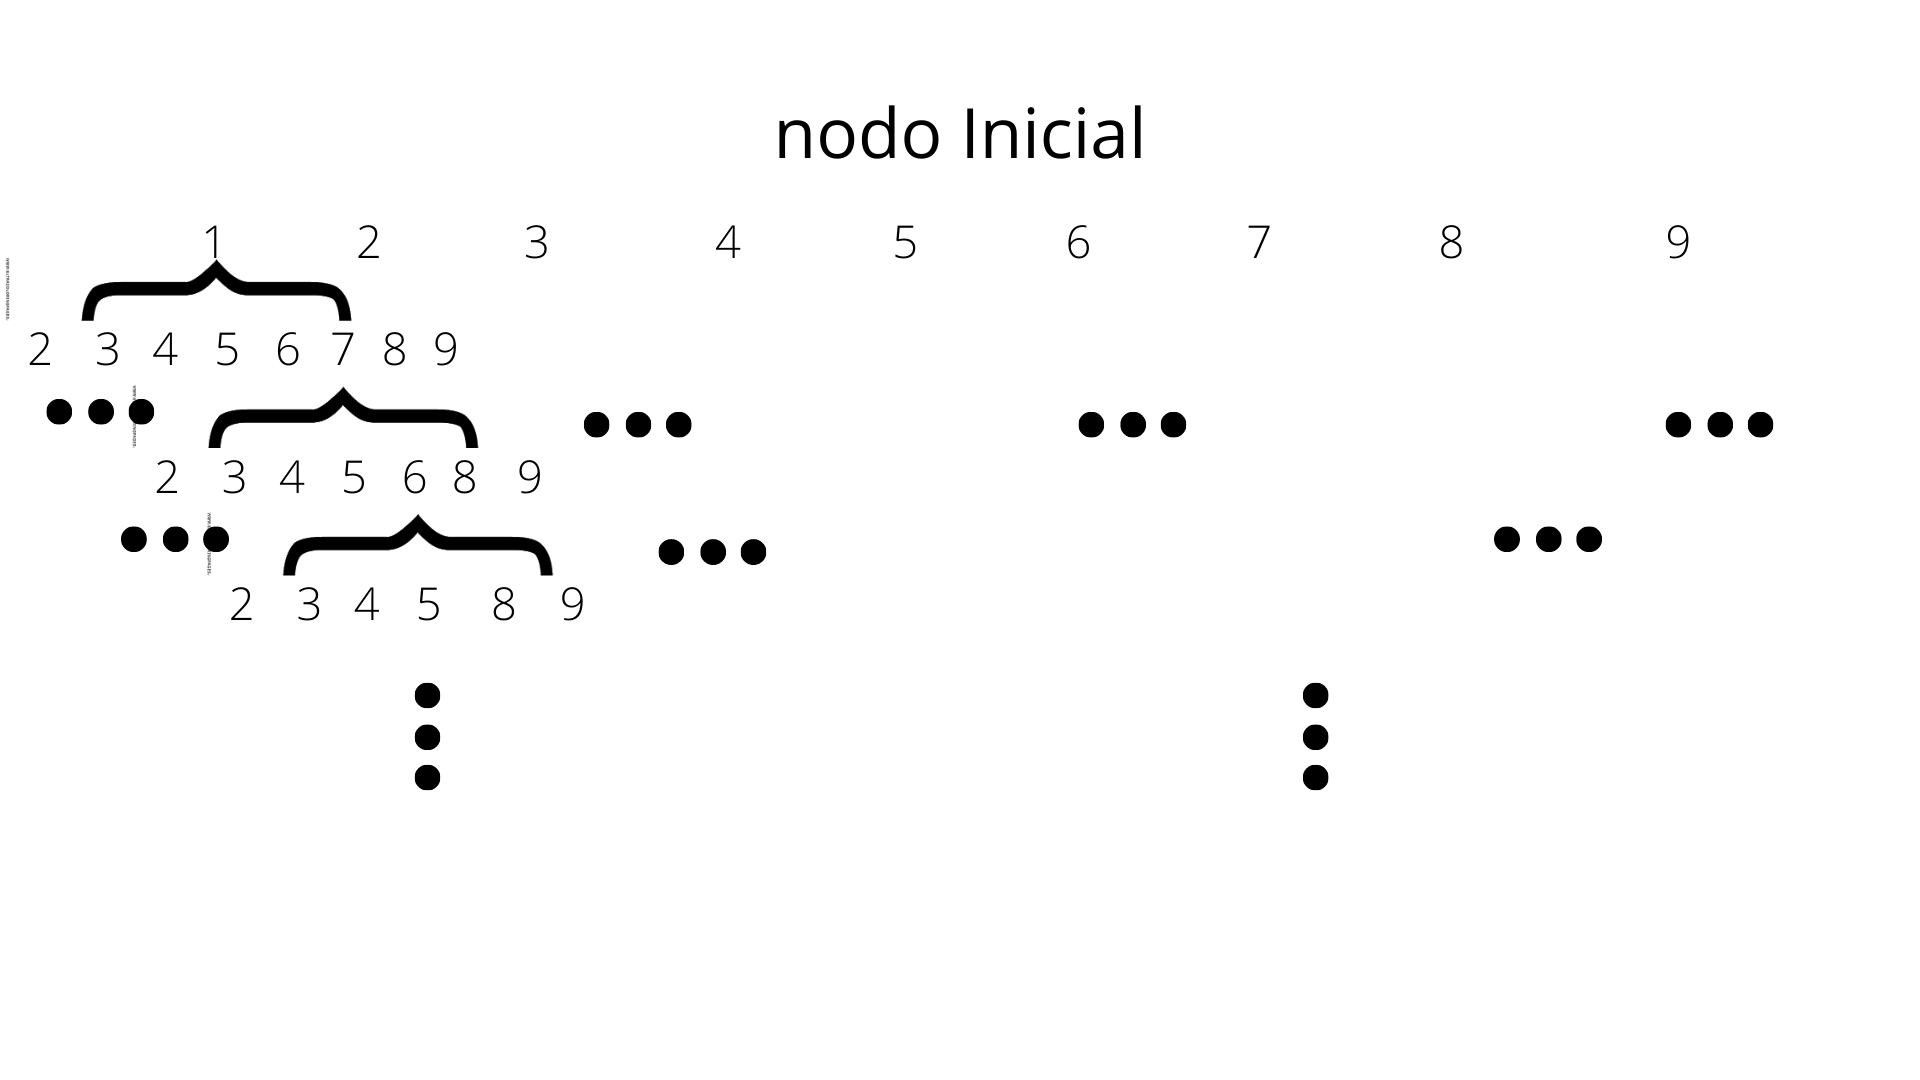

## Recorrido en profundidad

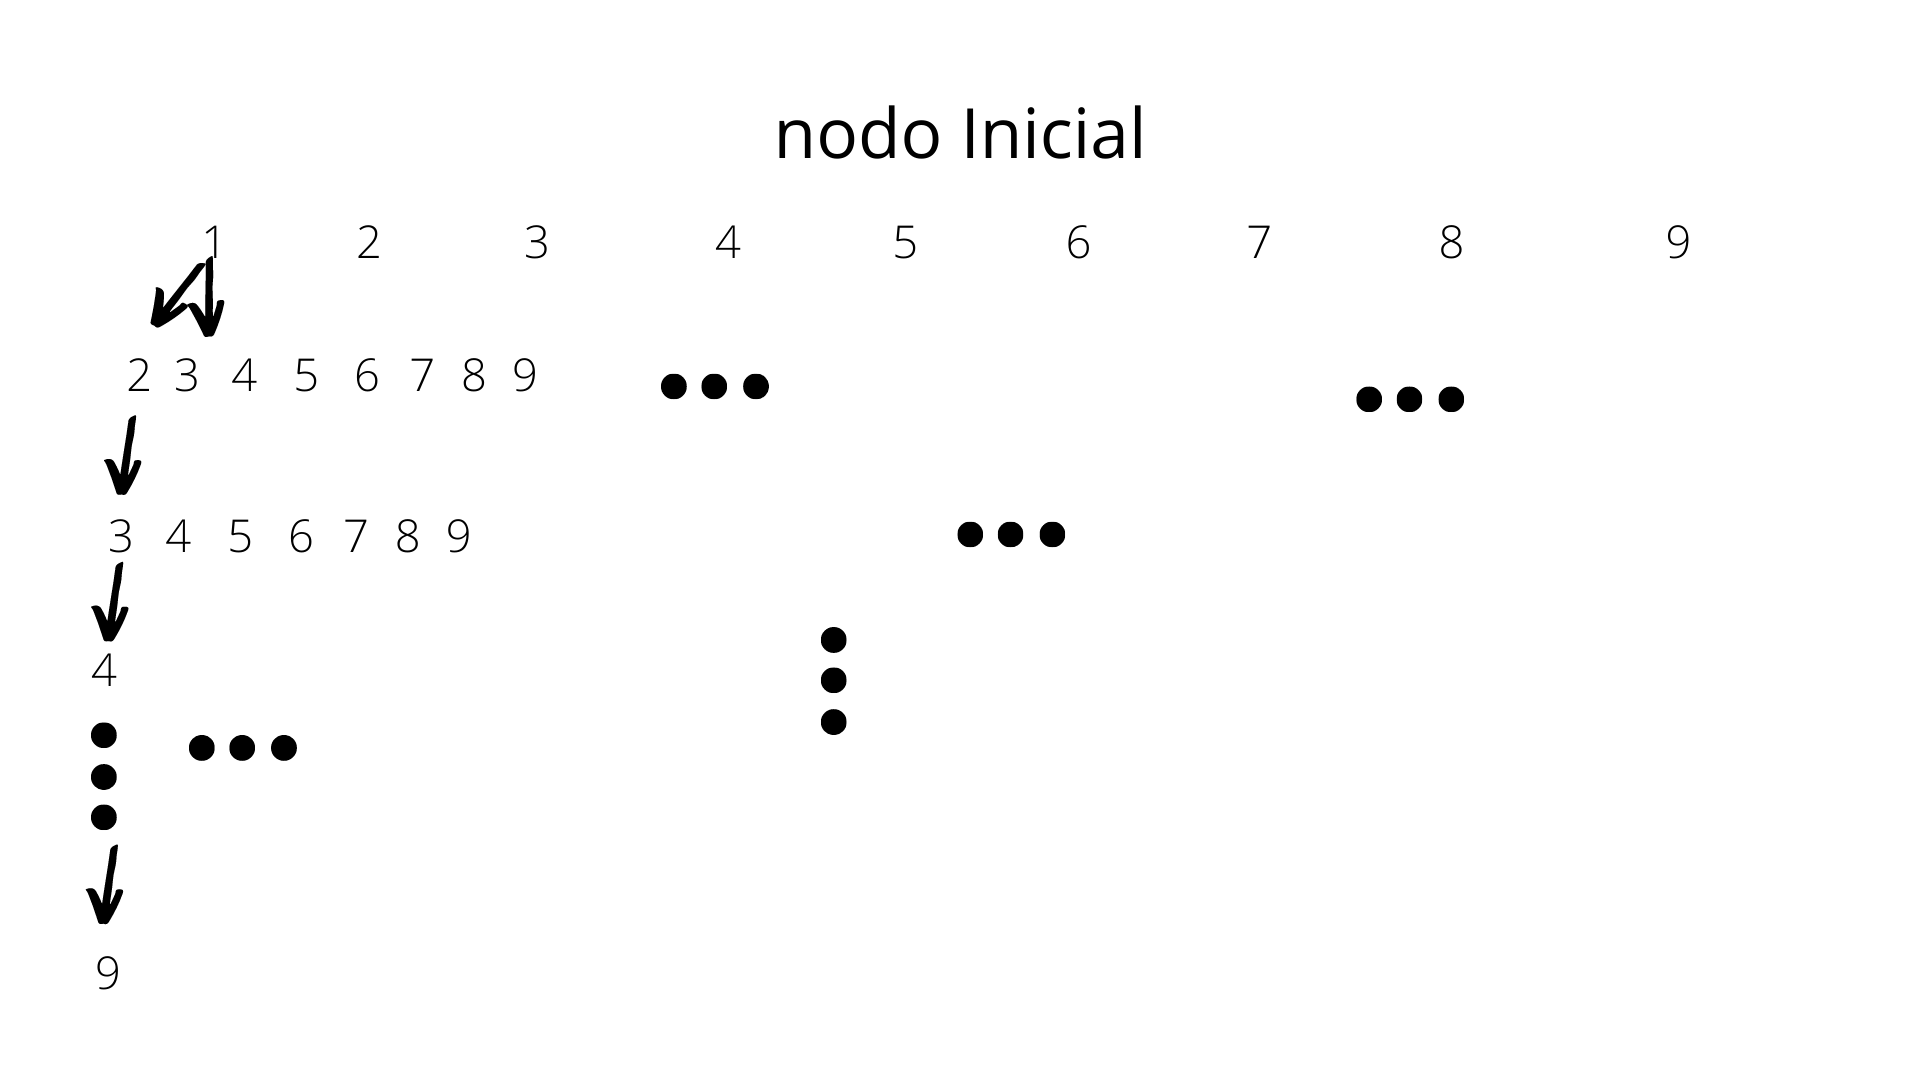

### Comparando Tree search con Graph search:
En este problema, al estar considerando que no se permiten repetidos, no es necesario realizar la verificación del control de repetidos al resolver. Por ello, el graph search en este problema tarda más. En el caso de la búsqueda en profundidad, no se aprecia tanto la diferencia pero en anchura sí. El problema no lo pudimos ejecutar completo debido al tiempo que tardaba.
   
   
Lo mismo ocurre con el resto de los algoritmos que usan graph search como es `uniform_cost_search`.

In [37]:
depth_first_graph_search(p).solution()

[9, 7, 2, 8, 4, 3, 6, 1, 5]

In [38]:
%%timeit
depth_first_graph_search(puzleInfantil()).solution()

335 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
resuelve_puzleInfantil(p.initial, depth_first_graph_search )

Solución: [9, 7, 2, 8, 4, 3, 6, 1, 5]
Algoritmo: depth_first_graph_search
Longitud de la solución: 9. Nodos analizados: 13084. 


In [40]:
breadth_first_graph_search(p).solution()

KeyboardInterrupt: 

In [41]:
uniform_cost_search(p).solution()

KeyboardInterrupt: 

### Búsqueda de profundidad limitada:
- Es completa en este caso ya que L = p = 9, siendo p la profundidad máxima.
- Es mejor que las búsquedas en profundidad ya que no realiza el control de repeticiones que ya era innecesario en este problema.
- A pesar de que en sí no es óptima, en este problema eso no importa ya que ninguna solución es mejor que otra

In [43]:
depth_limited_search(p,9).solution()

[1, 2, 4, 7, 5, 8, 3, 6, 9]

In [44]:
resuelve_puzleInfantil(p.initial, depth_limited_search )

Solución: [1, 2, 4, 7, 5, 8, 3, 6, 9]
Algoritmo: depth_limited_search
Longitud de la solución: 9. Nodos analizados: 1926. 


### Búsqueda de profundidad iterativa:
Al ser peor su tiempo que el de la búsqueda en anchura, para este problema, este algoritmo no sirve. Sigue expandiendo muchos nodos e incuso expande 400 nodos más que la búsqueda primero en anchura.

In [45]:
iterative_deepening_search(p).solution()

[1, 2, 4, 7, 5, 8, 3, 6, 9]

In [46]:
resuelve_puzleInfantil(p.initial, iterative_deepening_search )

Solución: [1, 2, 4, 7, 5, 8, 3, 6, 9]
Algoritmo: iterative_deepening_search
Longitud de la solución: 9. Nodos analizados: 988335. 


# Ejercicio 4
Grados de separación entre actores. Este problema es de naturaleza algo diferente ya que tendréis que trabajar con un grafo de datos sobre actores y películas. Según la teoría de los grados de separación de Kevin Bacon cualquier persona de la industria del cine de Hollywood puede conectarse con Kevin Bacon en un máximo de 6 pasos donde cada paso es una película en la que han participado dos personas. En este problema os pedimos encontrar el camino más corto entre dos actores dados, a través de la secuencia de películas que los conectan. Por ejemplo, el camino más corto entre Jennifer Lawrence y Tom Hanks tiene longitud 2: Jennifer Lawrence se conecta con Kevin Bacon por la película “X-Men: First Class,” y Kevin Bacon con Tom Hanks por “Apollo 13.”

In [ ]:
from copy import deepcopy
from aima3.search import *
from copy import deepcopy

## grados.py
import csv
import sys
from collections import *



# diccionario de nombres de personas con ids
names = {}
# diccionario: name, birth, movies (conjunto de movie_ids)
people = {}
# movie_ids to a dictionary of: title, year, stars (a set of person_ids)
movies = {}


def load_data(directory):
    """
    Load data from CSV files into memory.
    """
    # Cargamos el archivo people
    with open(f"{directory}/people.csv", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            people[row["id"]] = {
                "name": row["name"],
                "birth": row["birth"],
                "movies": set()
            }
            if row["name"].lower() not in names:
                names[row["name"].lower()] = {row["id"]}
            else:
                names[row["name"].lower()].add(row["id"])

    # cargamos el archivo movies
    with open(f"{directory}/movies.csv", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            movies[row["id"]] = {
                "title": row["title"],
                "year": row["year"],
                "stars": set()
            }

    # cargamos el archivo stars
    with open(f"{directory}/stars.csv", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            try:
                people[row["person_id"]]["movies"].add(row["movie_id"])
                movies[row["movie_id"]]["stars"].add(row["person_id"])
            except KeyError:
                pass


def main():
    if len(sys.argv) > 2:
        sys.exit("Para ejecutarlo en línea de comandos: python grados.py [directory]")
    directory = sys.argv[1] if len(sys.argv) == 2 else "large"

    # Load data from files into memory
    print("Cargando los datos...")
    load_data(directory)
    print("Datos cargados.")

    source = person_id_for_name(input("Nombre: "))
    if source is None:
        sys.exit("Esa persona no se encuentra.")
    target = person_id_for_name(input("Nombre: "))
    if target is None:
        sys.exit("Esa persona no se encuentra.")

    path = shortest_path(source, target)

    if path is None:
        print("No están conectados.")
    else:
        degrees = len(path) -1
        print(f"{degrees} grados de separacion.")
        for i in range(degrees):
            person1 = people[path[i][1]]["name"]
            person2 = people[path[i + 1][1]]["name"]
            movie = movies[path[i + 1][0]]["title"]
            print(f"{i + 1}: {person1} y {person2} participaron en {movie}")


def shortest_path(source, target):
    """
    Devuelve la lista de pares (movie_id, person_id) que conectan source y target o None si hay conexion.
    """

    person_id = source
    node = Node(("", person_id))
    dest_id = target
    frontier = deque([node])
    explored = set()
    encontrado = False
    nodoFinal = None
    while frontier and encontrado==False:
        node = frontier.popleft()
        explored.add(node.state)
        for (movie_id, person_id) in neighbors_for_person(node.state[1]):
            node2 = Node((movie_id, person_id), node)
            if node2.state not in explored and node2.state not in frontier:
                if person_id == dest_id:
                    encontrado = True
                    nodoFinal = node2
                    break
                frontier.append(node2)

    node, path_back = nodoFinal, []
    while node:
        path_back.append(node.state)
        node = node.parent
    camino= list(reversed(path_back))
    return camino

    # TODO
    raise NotImplementedError


def person_id_for_name(name):
    """
    Returns the IMDB id for a person's name,
    resolving ambiguities as needed.
    """
    person_ids = list(names.get(name.lower(), set()))
    if len(person_ids) == 0:
        return None
    elif len(person_ids) > 1:
        print(f"Which '{name}'?")
        for person_id in person_ids:
            person = people[person_id]
            name = person["name"]
            birth = person["birth"]
            print(f"ID: {person_id}, Name: {name}, Birth: {birth}")
        try:
            person_id = input("Intended Person ID: ")
            if person_id in person_ids:
                return person_id
        except ValueError:
            pass
        return None
    else:
        return person_ids[0]


def neighbors_for_person(person_id):
    """
    Returns (movie_id, person_id) pairs for people who starred with a given person.
    """
    movie_ids = people[person_id]["movies"]
    neighbors = set()
    for movie_id in movie_ids:
        for person_id in movies[movie_id]["stars"]:
            neighbors.add((movie_id, person_id))
    return neighbors


if __name__ == "__main__":
    print("Grados.py")
    main()

## Resultados de ejecución
Cargando los datos...

Datos cargados.

Nombre: Emma Watson

Nombre: Jennifer Lawrence

3 grados de separacion.

1: Emma Watson y Ethan Hawke participaron en Regression

2: Ethan Hawke y Philip Seymour Hoffman participaron en Before the Devil Knows You're Dead

3: Philip Seymour Hoffman y Jennifer Lawrence participaron en The Hunger Games: Catching Fire


## Explicación:
Al querer encontrar el camino más corto entre estos actores, los mejores algoritmos para resolver este problema son aquellos basados en el recorrido por anchura.
Esto es así ya que al ir recorriendo por nivel los nodos, si en un nivel encuentra el estado deseado, esta solución es una de las que tienen el camino más corto. Puede que haya una más adelante, incluso en el mismo nivel, pero sabemos que tendrá la misma longitud de la que acabamos de encontrar.

### Explicación de la implementación:
Se hizo un algoritmo basado en el algoritmo de aima `breadth_first_graph_search` en el que controlamos los repetidos. En este caso no extendemos los nodos para buscar todas las acciones posibles sino que buscamos para ese actor `neighbors_for_person` que son todas las estrellas con las que ha trabajado en varias películas.

Luego esta información se transforma en el nodo y se utiliza la frontera para ir recorriendo todas las posibilidades. Se utilizan los nodos ya que estos tienen la facilidad de guardar su nodo padre; así, cuándo encuentra solución, recorre los nodos padres guardando sus estados en la lista "camino" que es lo que devuelve nuestra función.